Importing the Libraries and Datasets

In [ ]:
!pip install WordCloud

In [ ]:
# Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Load the data
data = pd.read_csv('train.csv')
idx = np.random.randint(data.shape[0], size=30000)
data = data.iloc[idx]

In [ ]:
data

,id,label,tweet
26480,26481,0,i am yummy. #i_am #positive #affirmation
2357,2358,0,"control your feeling , dont your feelings cont..."
12956,12957,0,gonna embrace every moment of this trip
250,251,0,@user happy at w.ork conference: right mindse...
11517,11518,0,absolutely loved the training today! met lots ...
...,...,...,...
2658,2659,0,"after 16 months, we meet again. #sunny #sky #g..."
30555,30556,0,friday! #ff our breakroom panel: @user @user...
6147,6148,0,everyone's cooking political potatoes on @user...
2578,2579,0,happy feet. happy hea! #walk #sunny #magical ...


In [ ]:
data.drop('id', axis=1, inplace=True)
data.head()

,label,tweet
26480,0,i am yummy. #i_am #positive #affirmation
2357,0,"control your feeling , dont your feelings cont..."
12956,0,gonna embrace every moment of this trip
250,0,@user happy at w.ork conference: right mindse...
11517,0,absolutely loved the training today! met lots ...


Exploring the Dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02d4e39d50>]],
      dtype=object)

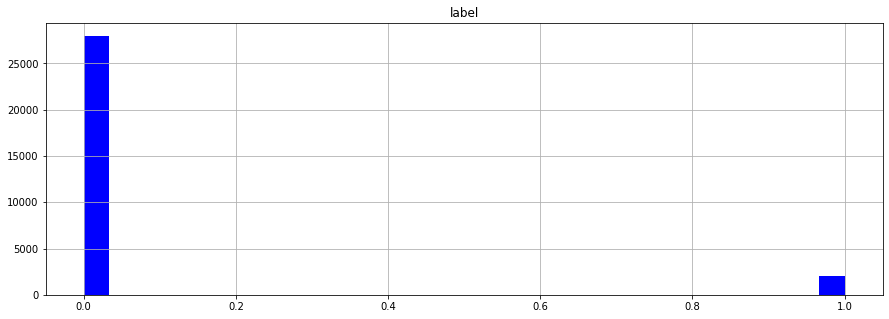

In [ ]:
data.hist(bins=30, figsize=(15,5), color='b')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


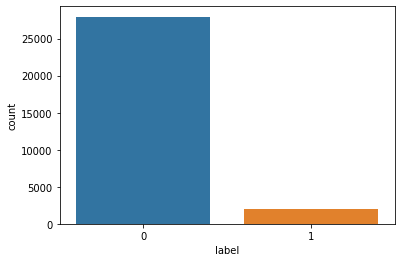

In [ ]:
sns.countplot(data['label'], label='count')

In [ ]:
# Save the length of each tweets(character) in a sepearte column
data['length'] = data['tweet'].apply(len)
data.head()

,label,tweet,length
26480,0,i am yummy. #i_am #positive #affirmation,45
2357,0,"control your feeling , dont your feelings cont...",77
12956,0,gonna embrace every moment of this trip,41
250,0,@user happy at w.ork conference: right mindse...,105
11517,0,absolutely loved the training today! met lots ...,108


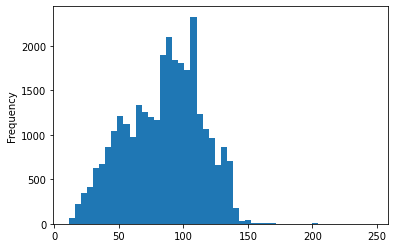

In [ ]:
# Plot a histogram on the character count/tweet length
data['length'].plot(bins=50, kind='hist')

In [ ]:
positive = data[data['label']==0]
positive

,label,tweet,length
26480,0,i am yummy. #i_am #positive #affirmation,45
2357,0,"control your feeling , dont your feelings cont...",77
12956,0,gonna embrace every moment of this trip,41
250,0,@user happy at w.ork conference: right mindse...,105
11517,0,absolutely loved the training today! met lots ...,108
...,...,...,...
2658,0,"after 16 months, we meet again. #sunny #sky #g...",93
30555,0,friday! #ff our breakroom panel: @user @user...,97
6147,0,everyone's cooking political potatoes on @user...,122
2578,0,happy feet. happy hea! #walk #sunny #magical ...,90


In [ ]:
negative = data[data['label']==1]
negative

,label,tweet,length
26249,1,hows stuff like this still happening in the 21...,119
16714,1,@user @user @user thoughts on female fighters ...,79
4584,1,@user #allahsoil we should never equate cultur...,96
321,1,"@user ""the dying of the light"" village green/...",100
14444,1,@user research: and played greatest role in ...,71
...,...,...,...
29204,1,girls in the world jgirl sex,30
22408,1,"@user @user @user what do u expect,#trump's fa...",118
28151,1,@user donald - putin's butt buddy and a commie.,49
17621,1,"that's harsh, even in these post #brexit, #x...",112


Plot the WordCloud

In [ ]:
sentences = data['tweet'].to_list()
sentences[:10]

['i am yummy. #i_am #positive #affirmation     ',
 'control your feeling , dont your feelings control you #quote  #saturday ð\x9f\x92\x8b ',
 'gonna embrace every moment of this trip  ',
 ' @user happy at w.ork conference: right mindset leads to culture-of-development organizations    #workâ\x80¦',
 'absolutely loved the training today! met lots of amazing people! #leeds #buisness #livelifetofull   #success',
 'hows stuff like this still happening in the 21st century? what was the point of the civil rights movement if peopleâ\x80¦ ',
 'goodnight world sleep tight. going for a long walk tomorrow.   #dogwalking',
 '  #tired and #workedout #pibble needs a nap.) ð\x9f\x90¶ð\x9f\x92\x95 #girlpower ',
 'wat a #censorboard we hav, first they promoted, then released the movie online, stil everybody is blaming them,    #udtapunjableaked',
 ' @user beautiful sunset tonight #grateful #allthelove   #summer #behappy #behealthy #imagine #beautiful #allofthis ']

In [ ]:
len(sentences)

30000

In [ ]:
single_sentence = ' '.join(sentences)
single_sentence[:500]

'i am yummy. #i_am #positive #affirmation      control your feeling , dont your feelings control you #quote  #saturday ð\x9f\x92\x8b  gonna embrace every moment of this trip    @user happy at w.ork conference: right mindset leads to culture-of-development organizations    #workâ\x80¦ absolutely loved the training today! met lots of amazing people! #leeds #buisness #livelifetofull   #success hows stuff like this still happening in the 21st century? what was the point of the civil rights movement if peopleâ\x80¦ '

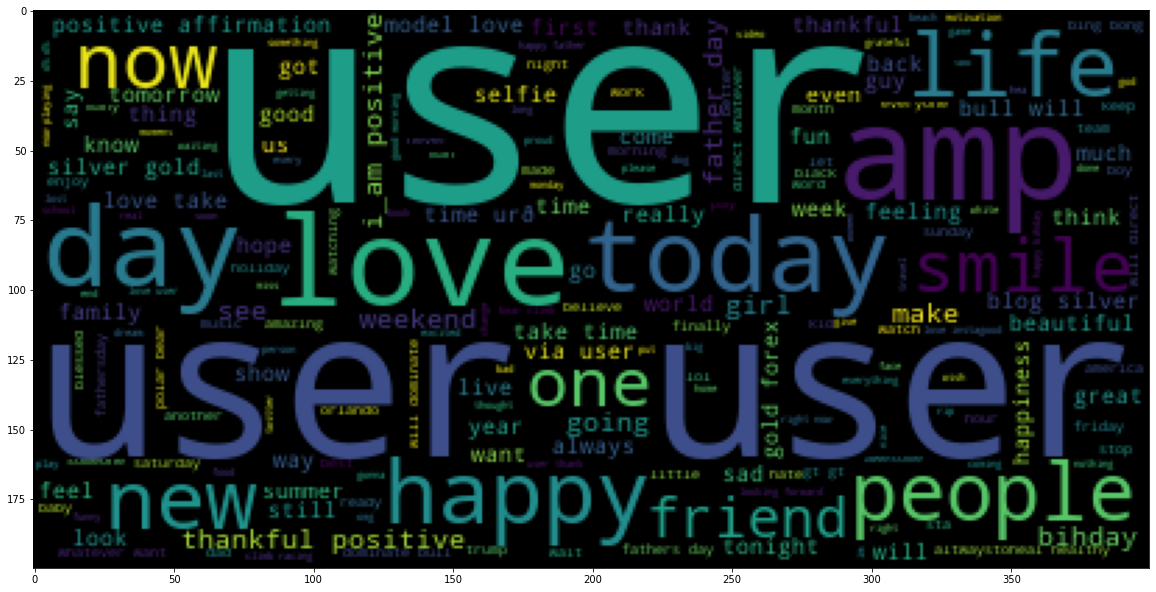

In [ ]:
# Plot the WordCloud for all tweets
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(single_sentence))

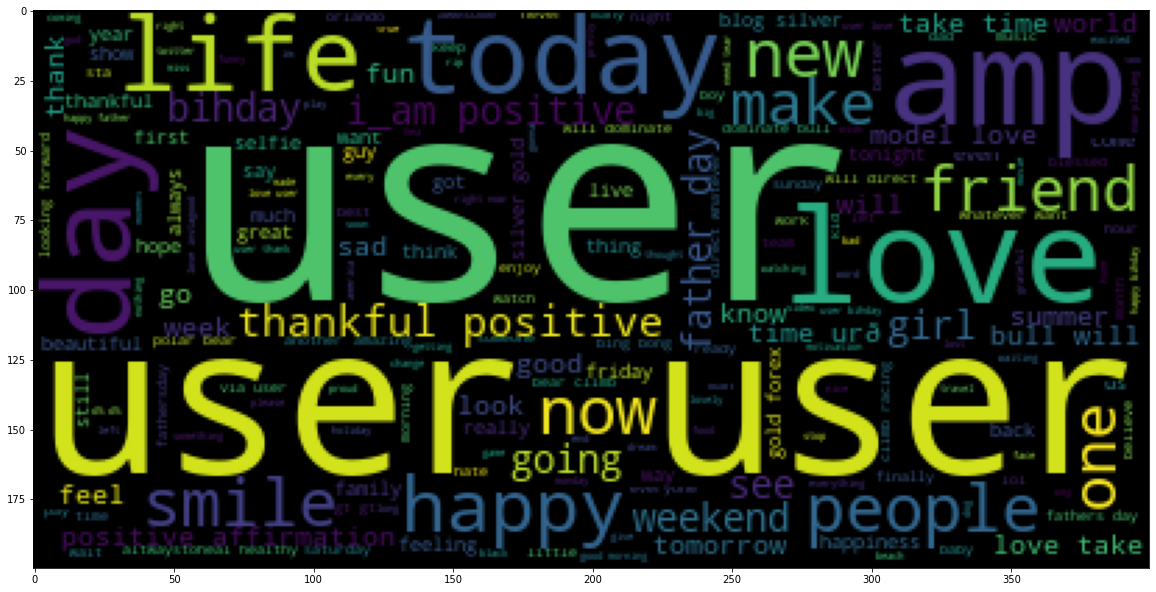

In [ ]:
# Plot the WorldCloud for positive words
positive_sentences = positive['tweet'].to_list()
single_positive = ' '.join(positive_sentences)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(single_positive))

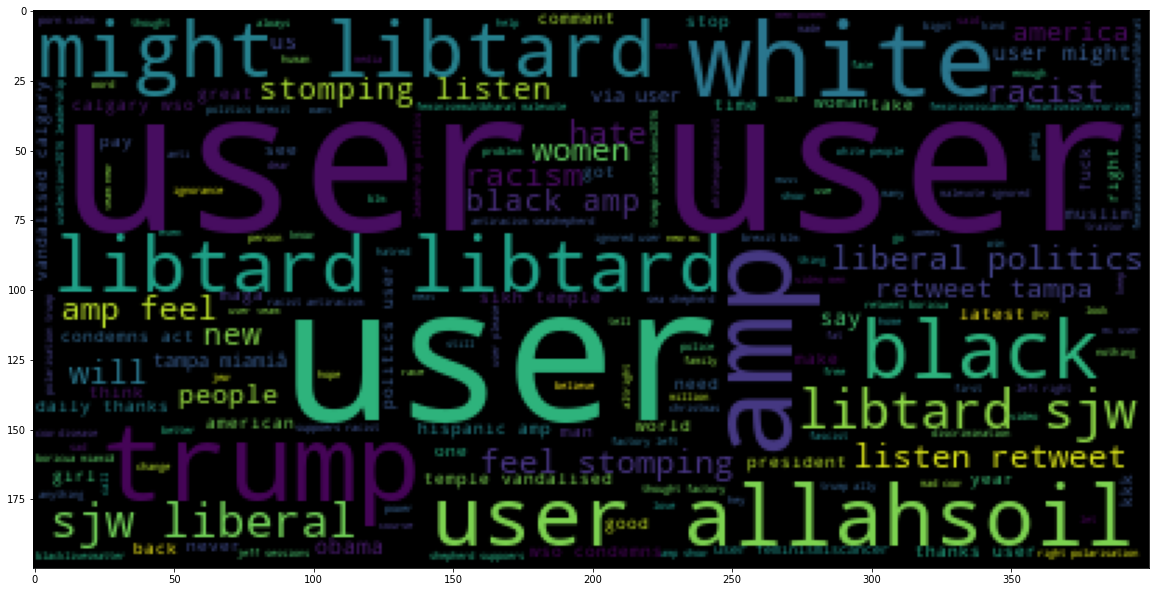

In [ ]:
# Plot the WorldCloud for negative words
negative_sentences = negative['tweet'].to_list()
single_negative = ' '.join(negative_sentences)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(single_negative))

Data Cleaning: Remove Punctuation

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# Lets test our string punctuation with a test string
Test = 'Good morning beautiful people :)... I am having fun learning Machine learning and AI!!'

In [ ]:
test_punc_remove = ''.join([c for c in Test if c not in string.punctuation])
test_punc_remove

'Good morning beautiful people  I am having fun learning Machine learning and AI'

Data Cleaning: Remove Stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Import the stopwords and see them
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
test_punc_clean = [word for word in test_punc_remove.split() if word.lower() not in stopwords.words('english')]
test_punc_clean

['Good',
 'morning',
 'beautiful',
 'people',
 'fun',
 'learning',
 'Machine',
 'learning',
 'AI']

In [ ]:
def message_cleaning(message):
    punc_removed = [char for char in message if char not in string.punctuation]
    punc_removed_join = ''.join(punc_removed)
    punc_removed_join_clean = [word for word in punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return punc_removed_join_clean

In [ ]:
# Apply the function to our tweet dataset
data_clean = data['tweet'].apply(message_cleaning)

In [ ]:
print(data_clean[5]) # Cleaned up version
print(data['tweet'][5]) # Show the orignal version

5    [22, huge, fan, fare, big, talking, leave, cha...
5    [22, huge, fan, fare, big, talking, leave, cha...
Name: tweet, dtype: object
5    [2/2] huge fan fare and big talking before the...
5    [2/2] huge fan fare and big talking before the...
Name: tweet, dtype: object


Count Vectorization or Tokenization

In [ ]:
vectorizer = CountVectorizer(analyzer=message_cleaning, dtype='uint8')
tweets_countvectorizer = vectorizer.fit_transform(data['tweet']).toarray()

In [ ]:
vectorizer.get_feature_names()[:10]

['0',
 '0000001',
 '00027',
 '01',
 '0115',
 '01926889917',
 '02',
 '0266808099',
 '03',
 '030916']

In [ ]:
tweets_countvectorizer

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
tweets_countvectorizer.shape

(30000, 33914)

Naive Bayes

In [ ]:
# Define the features(x) and labels(y) for our model
x = tweets_countvectorizer
y = data['label']

In [ ]:
x.shape

(30000, 33914)

In [ ]:
y.shape

(30000,)

Train the Naive Bayes Classifier Model

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
NB_classifier = MultinomialNB()
NB_classifier.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Check our Model Accuracy through Confusion Matrix

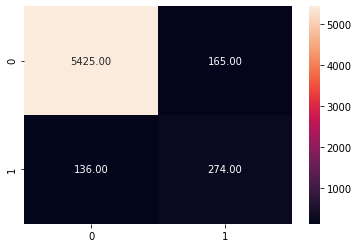

In [ ]:
np.set_printoptions(precision=3)
from sklearn.metrics import classification_report, confusion_matrix
y_predict_test = NB_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt='.2f')

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      5590
           1       0.62      0.67      0.65       410

    accuracy                           0.95      6000
   macro avg       0.80      0.82      0.81      6000
weighted avg       0.95      0.95      0.95      6000

